<a href="https://colab.research.google.com/github/MuhammadHassan667410/160-Days-of-learning-complete-AI/blob/main/Phase%202%20%3A%20Machine%20Learning%2C(Day%2020%20to%2050)/Dimensionality%20Reduction%20%2B%20Ensemble%20Learning%20%2B%20Imbalanced%20Data(Day%2033%20to%2038)/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
import math
math.sqrt(len(y_test))

10.677078252031311

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
base_learner = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gd', GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=1, random_state=42)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=11))
]

In [ ]:
meta_learner = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)

In [ ]:
stacking_model = StackingClassifier(estimators=base_learner, final_estimator=meta_learner, cv=5)

In [ ]:
stacking_model.fit(x_train, y_train)

,estimators,"[('rf', ...), ('gd', ...), ...]"
,final_estimator,AdaBoostClass...ndom_state=42)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


In [ ]:
y_pred = stacking_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Axes: >

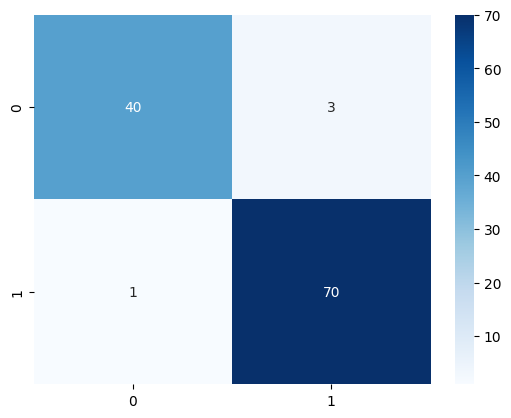

In [ ]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')